<a href="https://colab.research.google.com/github/lkranzho/TimeFreqAna_tutorial/blob/main/TimeFreqAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'>Time and Frequency Domain Analysis Tools</font>

In this tutorial, you will learn how to do some simple signal analysis in time and frequency domain using Python. This script does everything for you - no coding skills required - you just need to run individual cells, look at the outputs and answer some interpretatioal questions in between <font color='blue'>(in blue)</font>.

We first import some necessary packages for numerical calculations (numpy), plotting (matplotlib) and signal processing (scipy) and the data we are going to use in a later part of the tutorial.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.io import loadmat
from scipy.fft import fft, ifft

In [ ]:
!wget https://github.com/lkranzho/TimeFreqAna_tutorial/raw/main/myaudio.wav -P /content/sample_data/
!wget https://github.com/lkranzho/TimeFreqAna_tutorial/raw/main/officetemp.mat -P /content/sample_data/

--2023-08-30 08:50:53--  https://github.com/lkranzho/TimeFreqAna_tutorial/raw/main/myaudio.wav
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lkranzho/TimeFreqAna_tutorial/main/myaudio.wav [following]
--2023-08-30 08:50:54--  https://raw.githubusercontent.com/lkranzho/TimeFreqAna_tutorial/main/myaudio.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889640 (869K) [audio/wav]
Saving to: ‘/content/sample_data/myaudio.wav’

myaudio.wav         100%[===================>] 868.79K  --.-KB/s    in 0.05s   

2023-08-30 08:50:54 (15.6 MB/s) - ‘/content/sample_data/myaudio.wav’ saved [889640/889640]

We first generate a sine (5Hz) and a square (3Hz) signal and plot both in time domain.

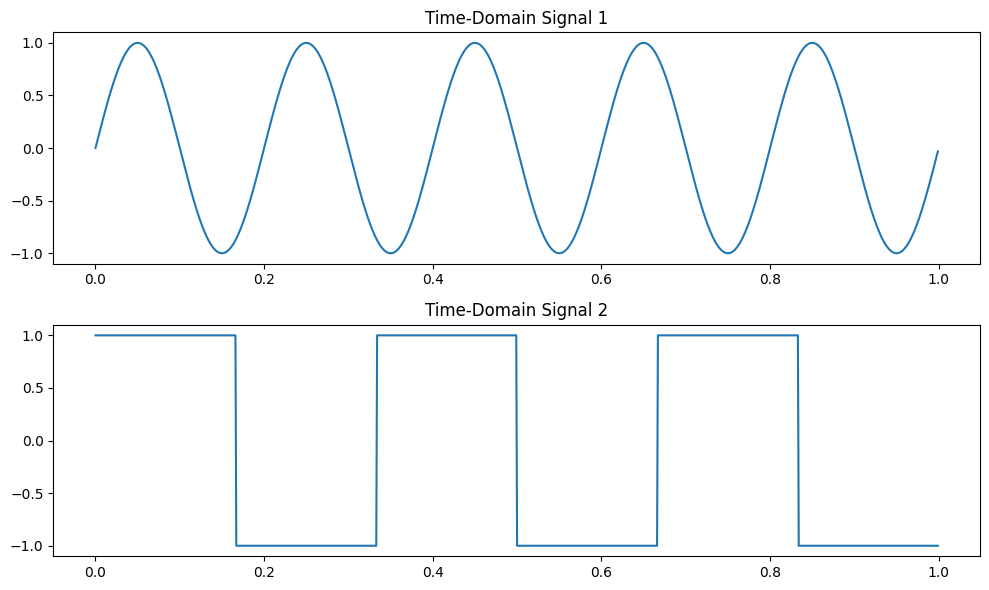

In [ ]:
# Generate time values
t = np.linspace(0, 1, 1000, endpoint=False)

# Generate example signals (e.g., sine, square, etc.)
sig1 = np.sin(2 * np.pi * 5 * t)
sig2 = signal.square(2 * np.pi * 3 * t)

# Plot time-domain signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig1)
plt.title('Time-Domain Signal 1')
plt.subplot(2, 1, 2)
plt.plot(t, sig2)
plt.title('Time-Domain Signal 2')
plt.tight_layout()
plt.show()


The Fourier Transform is a fundamental concept in signal processing and mathematics that helps us understand how different frequency components contribute to a signal. It is a mathematical tool that allows us to analyze a signal in terms of its frequency content, breaking it down into its constituent sine and cosine wave components. This transformation is incredibly useful because it enables us to view signals from a different perspective: the frequency domain. Fourier Transform has wide-ranging applications. For example, on audio processing, it helps us analyze and manipulate sounds, while in image processing, it aids in compression and enhancement of images. In engineering, it is utilized to understand and design systems with specific frequency responses, such as filters.

Performing the Fourier Transform involves converting a signal from its original time domain representation to the frequency domain. This is achieved by calculating the amplitudes and phases of the sinusoidal components that make up the signal. The result is a complex representation of the signal, showing how different frequencies contribute to its overall shape.

When we look at a frequency domain plot, we're observing the signal's behavior in terms of its frequency components. Here are some key concepts to help you interpret these plots:

**Amplitude:** The height of a frequency component's peak on the frequency domain plot represents the strength of that frequency in the original signal. Higher peaks indicate stronger contributions of certain frequencies to the overall signal.

**Frequency Components:** Each peak in the frequency domain plot corresponds to a particular frequency present in the original signal. This helps us identify the fundamental frequencies that compose the signal.

**Harmonics:** In addition to the fundamental frequency, you might notice smaller peaks at integer multiples of the fundamental frequency. These are called harmonics. Harmonics play a crucial role in creating the timbre and character of signals, particularly in musical tones.

We now perform a Fourier transform to the above sine and square signal and plot it. <font color='blue'>What do you observe?</font>.

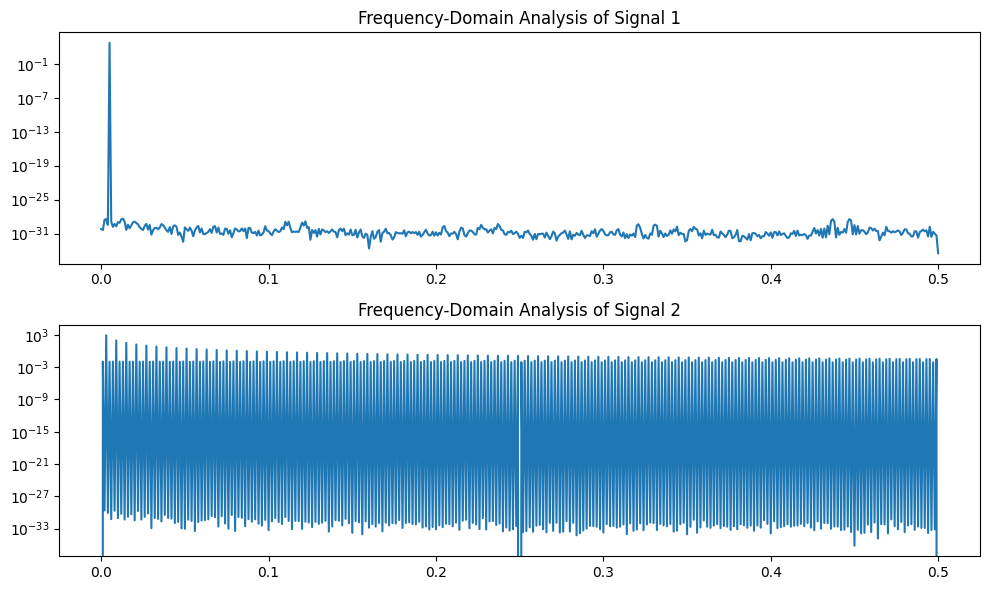

In [ ]:
# Perform Fourier transform
freq1, mag1 = signal.periodogram(sig1)
freq2, mag2 = signal.periodogram(sig2)

# Plot frequency-domain representation
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogy(freq1, mag1)
plt.title('Frequency-Domain Analysis of Signal 1')
plt.subplot(2, 1, 2)
plt.semilogy(freq2, mag2)
plt.title('Frequency-Domain Analysis of Signal 2')
plt.tight_layout()
plt.show()


# **Phase and Magnitude information of the FFT**


Here, we use an audio sample to understand what information is caried by the magnitude and the phase of the signal. To do this, we load an audio file of a ring-tone 'myaudio.wav'. The sample rate of this audio file is 44.1 kHz. You can use any other audio file in .wav format to analyse it with this script. Just upload it to the file explorer and change the name of the imported file in the code cell below.

We are applying an FFT to observe the frequency content of the signal. The output of the Fast-Fourier-Transform (FFT) is a complex number $x=x_r+\text{i}\,x_i$ with a real part $x_r$ and an imaginary part $x_i$. Normally, we look at the magnitude and phase of an FFT separately. The magnitude of the complex number $x$ is computed by $|x|=\sqrt{x_r^2+x_i^2}$ and the phase via $\arctan\left(x_i/x_r\right)$.

From our FFT, we obtain a compex vector containing information about the frequency content of the signal. The magnitude tells us something about the strength of the frequency components relative to other components. The phase tells us how all the frequecy components align in time. With the code below, we plot the magnitude and phase components of the frequency spectrum of the signal. The phase is unwrapped using the unwrap function so that we can see a continuous function of frequency.

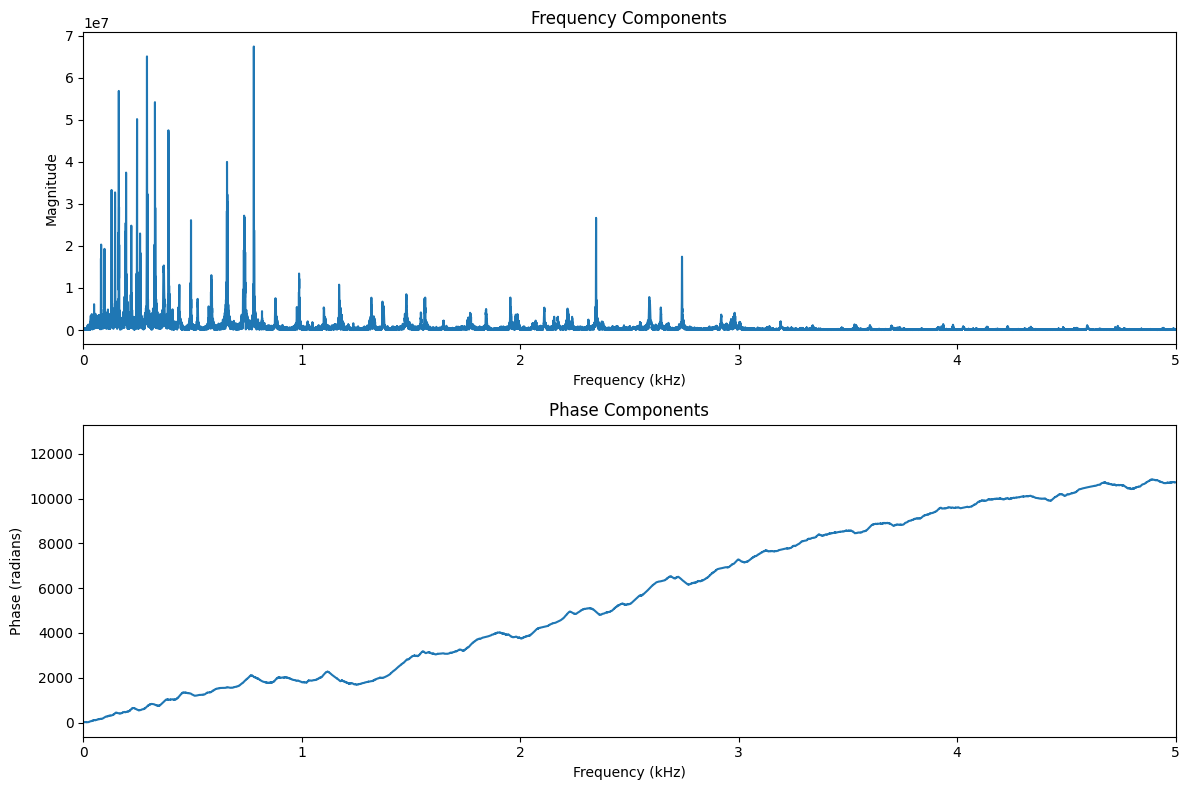

In [ ]:
# Load the .wav audio file
sample_rate, audio_data = wavfile.read('sample_data/myaudio.wav')

# Convert audio data to mono if stereo
if len(audio_data.shape) > 1:
    audio_data = audio_data.mean(axis=1)

# Calculate the time values
time_values = np.arange(len(audio_data)) / sample_rate

# Perform FFT
fft_values = fft(audio_data)
frequencies = np.fft.fftfreq(len(fft_values), d=1/sample_rate)

# Calculate magnitude and phase components
magnitude = np.abs(fft_values)
phase = np.unwrap(np.angle(fft_values))

# Plot frequency components
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, magnitude[:len(magnitude)//2])
plt.title('Frequency Components')
plt.xlabel('Frequency (kHz)')
plt.xlim([0,5])
plt.ylabel('Magnitude')

# Plot phase components
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, phase[:len(phase)//2])
plt.title('Phase Components')
plt.xlabel('Frequency (kHz)')
plt.xlim([0,5])
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


We can revice the time domain audio signal by applying an inverse Fourier transfer to the frequency domain vector $|x|\cdot e^{\text{i}\phi}$ with $|x|$ and $\phi$ being the magnitude and phase defined above. In time domain, we are dealing with a real-valued signal, so we zero out the small imaginary components that appear on the inverse transform due to numerical inaccuracies in the computation. Note that the original time signal and the recovered signal are practically the came (the norm of their difference is on the order of $10^{-14}$). The very small difference between the two is also due to the numerical inaccuracies mentioned above. <font color='blue'>Play and listen to the recovered un-transformed signal.</font>.

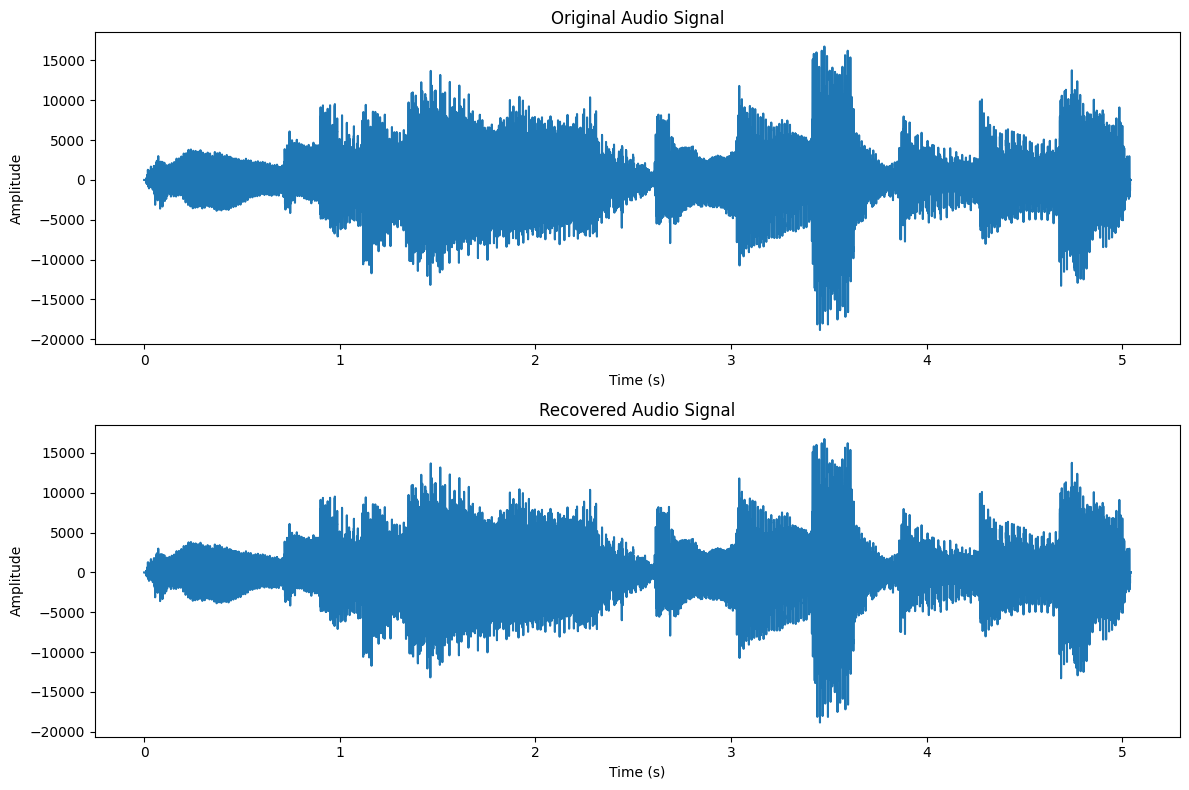

In [ ]:
# Perform Inverse FFT to recover the original signal
recovered_signal = ifft(magnitude * np.exp(1j * phase))

# Save recovered signal as a .wav file
recovered_signal = np.real(recovered_signal).astype(np.int16)
wavfile.write('sample_data/recovered_audio.wav', sample_rate, recovered_signal)

# Plot original and recovered signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time_values, audio_data)
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_values, np.real(recovered_signal))
plt.title('Recovered Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


To see the effects of changing the magnitude response of the signal, remove frequency components above 1 kHz directly from the FFT output (by making the magnitudes equal to zero) and listen to the effect this has on the sound of the audio file. Removing high frequency components of a signal is referred to as 'lowpass filtering'.

<font color='blue'>Play the signal. Do you hear a difference? Explain.</font>


Text(0, 0.5, 'Phase (radians)')

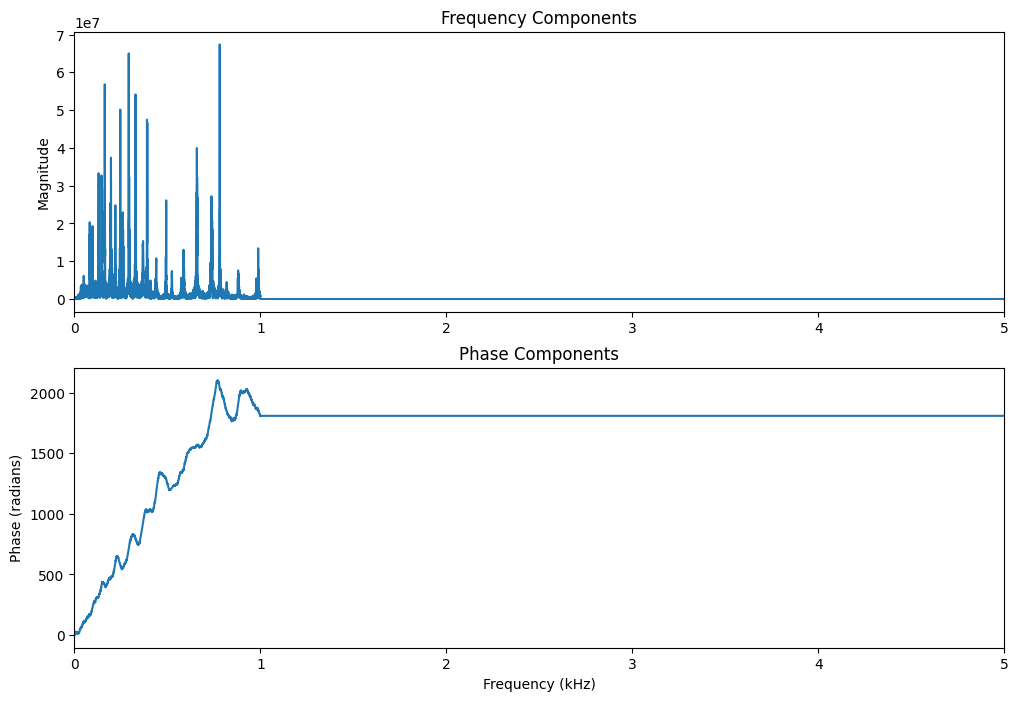

In [ ]:
# Remove frequency components above 1 kHz
cutoff_frequency = 1000  # in Hz
fft_values[frequencies > cutoff_frequency] = 0
filtered_magnitude = fft_values

# Perform Inverse FFT to recover the filtered signal
filtered_signal = ifft(fft_values)

magnitude = np.abs(fft_values)
phase = np.unwrap(np.angle(fft_values))

# Save filtered signal as a .wav file
filtered_signal = np.real(filtered_signal).astype(np.int16)
wavfile.write('sample_data/filtered_audio.wav', sample_rate, filtered_signal)

# Plot frequency components
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, magnitude[:len(magnitude)//2])
plt.title('Frequency Components')
plt.xlim([0,5])
plt.ylabel('Magnitude')

# Plot phase components
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, phase[:len(phase)//2])
plt.title('Phase Components')
plt.xlabel('Frequency (kHz)')
plt.xlim([0,5])
plt.ylabel('Phase (radians)')

The phase of a signal has important information about when in time the notes of the song appear. To illustrate the importance of phase on the audio signal, we remove the phase information completely by taking the magnitude of each frequency component. Note that by doing this you keep the magnitude response unchanged.

<font color='blue'>Get the signal back in the time domain and play the audio. Can you still recognise the song? Why?</font>

Text(0, 0.5, 'Phase (radians)')

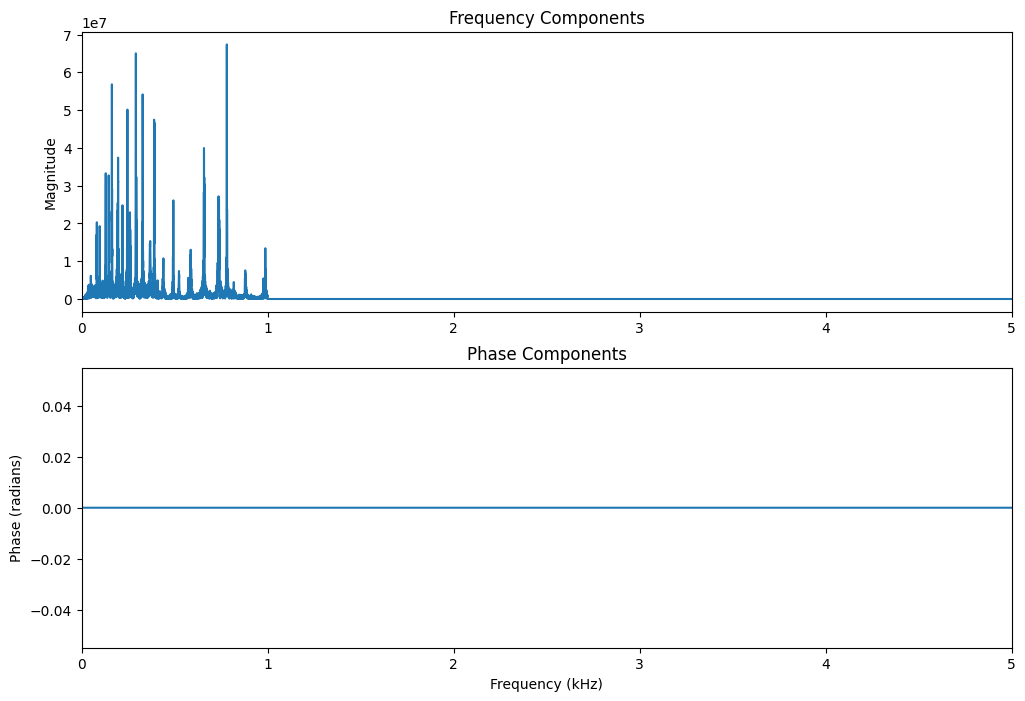

In [ ]:
# Calculate magnitude components
magnitude = np.abs(fft_values)

# Create a new FFT with magnitude and zero phase
new_fft_values = magnitude * np.exp(0j)
new_magnitude = np.abs(new_fft_values)
new_phase = np.angle(new_fft_values)

# Perform Inverse FFT to recover the signal with magnitude components only
magnitude_signal = ifft(new_fft_values)

# Save magnitude signal as a .wav file
magnitude_signal = np.real(magnitude_signal).astype(np.int16)
wavfile.write('sample_data/magnitude_audio.wav', sample_rate, magnitude_signal)


# Plot frequency components
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, new_magnitude[:len(new_magnitude)//2])
plt.title('Frequency Components')
plt.xlim([0,5])
plt.ylabel('Magnitude')

# Plot phase components
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2]*1e-3, new_phase[:len(new_phase)//2])
plt.title('Phase Components')
plt.xlabel('Frequency (kHz)')
plt.xlim([0,5])
plt.ylabel('Phase (radians)')

# **Finding Signal Periodicities**

The frequency domain representation of a signal allows you to observe several characteristics of the signal that are either not easy to see, or not visible at all when you look at the signal in the time domain. For instance, frequency-domain analysis becomes useful when you are looking for cyclic behavior of a signal.

**Analyzing Cyclic Behavior of the Temperature in an Office Building**

A thermometer in an office building measures the inside temperature in Fahrenheit every half hour for four months. The code cell below loads the data and plots it, converting the temperature to degrees Celsius and scaling the measurement time in weeks.

<font color='blue'>Question: Could there be any cyclic behaviour in this data?</font>



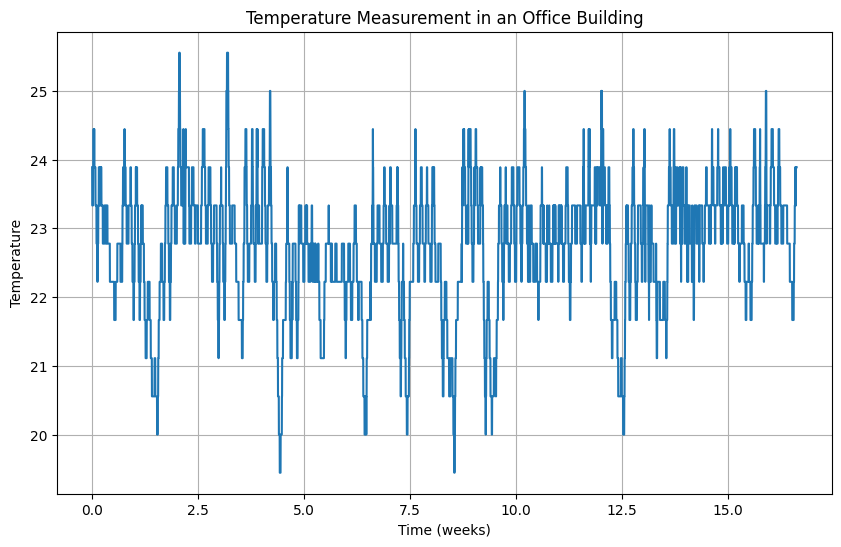

In [ ]:
# Load the .mat file
# https://github.com/qingkaikong/blog/blob/master/periodic%20signal_detection/data/officetemp.mat
data = loadmat('sample_data/officetemp.mat')
# convert to numpy array
temp = np.array([x[0] for x in data['temp']])

# convert the temp to Celsius
tempC = (temp - 32.)*5./9.

# this is sampling rate (per week)
fs = 2*24*7   # 2 measurements/h * 24h * 7d

# create timestamp
time_weeks = np.arange(len(temp))/float(fs)

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(time_weeks, tempC)
plt.title('Temperature Measurement in an Office Building')
plt.xlabel('Time (weeks)')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

It is almost impossible to know if there is any cyclic behavior on the office temperatures by looking at the time-domain signal. However, the cyclic behavior of the temperature becomes evident if we look at its frequency-domain representation.

We now obtain the frequency-domain representation of the signal and you plot the magnitude of the FFT output with a frequency axis scaled to cycles/week.

<font color='blue'>Question: What do you observe? Can you explain the location of the peaks?</font>

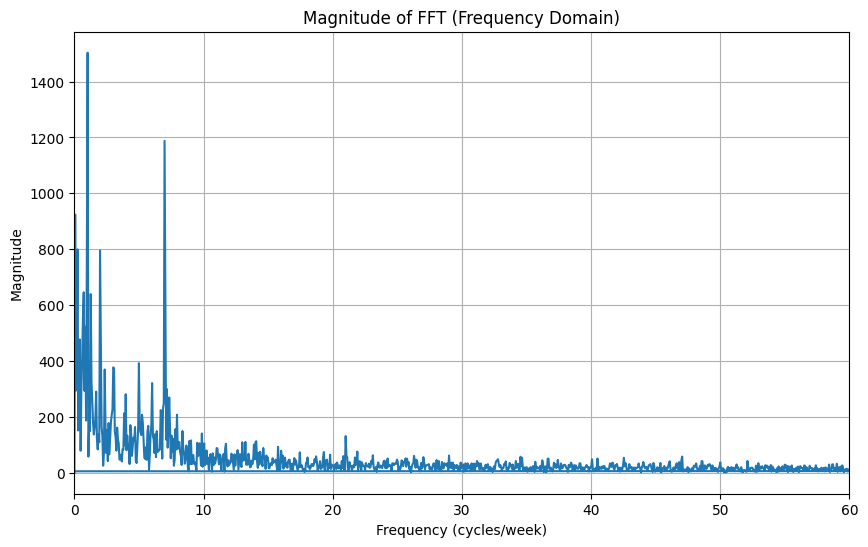

In [ ]:
# remove DC component and get temperature fluctuation around mean value
tempNorm = tempC - np.mean(tempC)


fft_values = fft(audio_data)
frequencies = np.fft.fftfreq(len(fft_values), d=1/sample_rate)
# Perform FFT
fft_values_temp = np.fft.fft(tempNorm)
freqs_temp = np.fft.fftfreq(len(fft_values_temp), d=1/fs)

# Convert frequencies to cycles per day
freqs_per_day = freqs_temp * 7

# Plot magnitude of FFT with frequency axis in cycles per day
plt.figure(figsize=(10, 6))
plt.plot(freqs_temp, np.abs(fft_values_temp))
plt.title('Magnitude of FFT (Frequency Domain)')
plt.xlabel('Frequency (cycles/week)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 60)
plt.show()
